# EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기
data = pd.read_csv('../data/동별통합데이터.csv')

In [6]:
import platform 

# 운영체제 확인 
system = platform.system()

# 한글폰트 설정 

if system == 'Darwin': # mac-os
  plt.rc('font', family = 'AppleGothic')
elif system == 'Windows': #windos os 
  plt.rc('font', family = 'Malgun Gothic')
else: # linux
  plt.rc('font', family = 'NanumGothic')
  
# 마이너스 기호(-) 깨짐 방지 
plt.rc('axes', unicode_minus=False)

# Basic Statistics

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import mode

def calculate_statistics(df):
    # 각 열의 평균 계산
    mean_values = df.mean()
    
    # 각 열의 중위수 계산
    median_values = df.median()
    
    # 각 열의 최빈값 계산
    mode_values = df.mode().iloc[0]  # 최빈값이 여러 개일 경우 첫 번째 값을 선택
    
    # 각 열의 최소값 계산
    min_values = df.min()
    
    # 각 열의 최대값 계산
    max_values = df.max()
    
    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values, 'Min': min_values, 'Max': max_values})
    
    return result_df

df = pd.DataFrame(data)
df = df.iloc[:,3:]
# 함수 호출
result = calculate_statistics(df)

# 결과 출력
print(result)

                             Mean   Median    Mode   Min     Max
Hospital_Counts          4.689655      3.0     2.0     1      19
Sales_Counts             2.110345      1.0     0.0     0      12
Consignment_Counts       4.193103      3.0     1.0     0      24
Transit_Counts           2.262069      1.0     0.0     0      25
Production_Counts        0.172414      0.0     0.0     0       3
Import_Counts            0.089655      0.0     0.0     0       2
Population           50827.779310  41423.0  2457.0  2457  253958
Pet_Owners            2144.627586   1621.0  1559.0   119   10512
Total_Registrations   2725.820690   2064.0  2005.0   163   14555


# Histogram

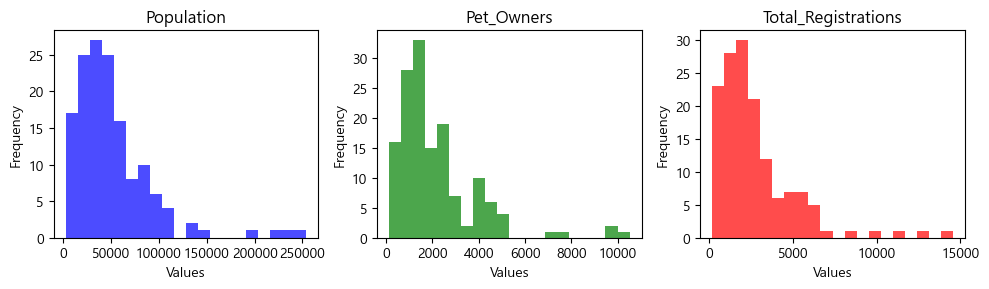

In [33]:
import pandas as pd
import matplotlib.pyplot as plt



fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Population 히스토그램
axs[0].hist(data['Population'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Population')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Pet_Owners 히스토그램
axs[1].hist(data['Pet_Owners'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Pet_Owners')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Total_Registrations 히스토그램
axs[2].hist(data['Total_Registrations'], bins=20, color='red', alpha=0.7)
axs[2].set_title('Total_Registrations')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# 서대문구 구단위 반려동물 등록수
sdm = 16944

# 각 동별 인구수대비 반려동물 등록수의 최대 비율
df_ratio = df['Total_Registrations'] / df['Population']
max_ratio = df_ratio.max()

# 동 단위 반려동물 등록수 최대값
max = 14555

# 서대문구 인구수를 바탕으로한 최대 비율과 반려동물 등록수 최대값의 평균
sdm_max = ((max_ratio * sdm) + max)/2


print('최대 비율: ', max_ratio, '| 최대 등록수: ', max, '| 서대문구 최대 등록수: ', sdm_max)


최대 비율:  0.3088740369442124 | 최대 등록수:  14555 | 서대문구 최대 등록수:  9894.280840991367


# Heat Map

['sans-serif']


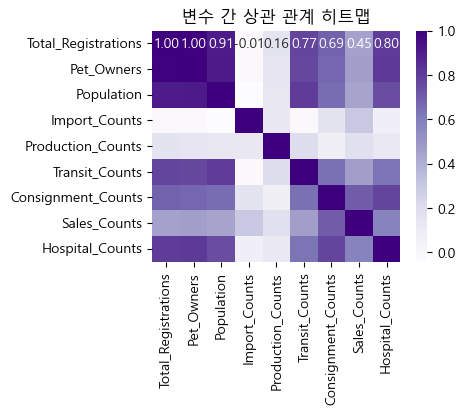

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pairplot = data[['Total_Registrations', 'Pet_Owners', 'Population',
                                                      'Import_Counts', 'Production_Counts', 'Transit_Counts',
                                                      'Consignment_Counts', 'Sales_Counts', 'Hospital_Counts']]

print(plt.rcParams['font.family'])
# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['NanumGothic', 'Arial Unicode MS', 'Malgun Gothic']

# 변수 간의 상관 관계 계산
correlation_matrix = df_pairplot.corr()

# 히트맵 생성
plt.figure(figsize=(4, 3))

sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title('변수 간 상관 관계 히트맵')
plt.show()

In [11]:
# 표 그리기
import plotly.express as px

data_corr=data.drop(['Gu',	'Dong'],axis=1)
# 열들 간의 상관 관계 계산
correlation = data_corr.corr()

# 소수점 둘째자리까지 반올림
correlation

fig = px.imshow(correlation, text_auto=True)
fig.show()

# Box Plot

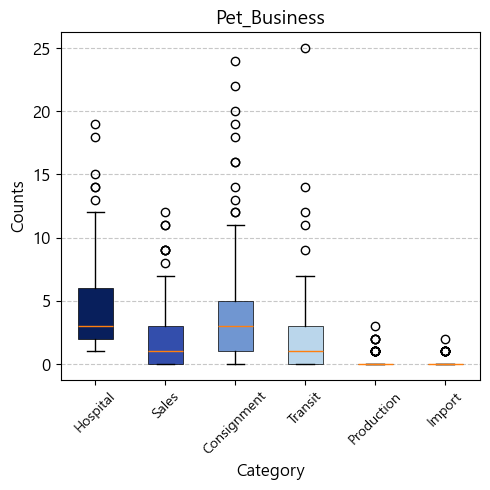

In [36]:

# X 축: Gu, Y 축: 업종

Gu_Dong_Pet_Business = data
plt.figure(figsize=(5, 5), facecolor='white')  # 용지의 배경색을 변경하려면 facecolor를 설정합니다.
bp = plt.boxplot([Gu_Dong_Pet_Business['Hospital_Counts'],
             Gu_Dong_Pet_Business['Sales_Counts'],
             Gu_Dong_Pet_Business['Consignment_Counts'],
             Gu_Dong_Pet_Business['Transit_Counts'],
             Gu_Dong_Pet_Business['Production_Counts'],
             Gu_Dong_Pet_Business['Import_Counts']],
             labels=['Hospital', 'Sales', 'Consignment', 'Transit', 'Production', 'Import'], patch_artist=True)

colors = ['#081F5C', '#334EAC', '#7096D1', '#BAD6EB', '#D0E3FF', '#FFF9F0']  # 원하는 색상으로 변경 가능

# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['NanumGothic', 'Arial Unicode MS', 'Malgun Gothic']

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=0.5)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Category', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Pet_Business', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()

plt.savefig('Pet_Business.png', dpi=300, bbox_inches='tight')

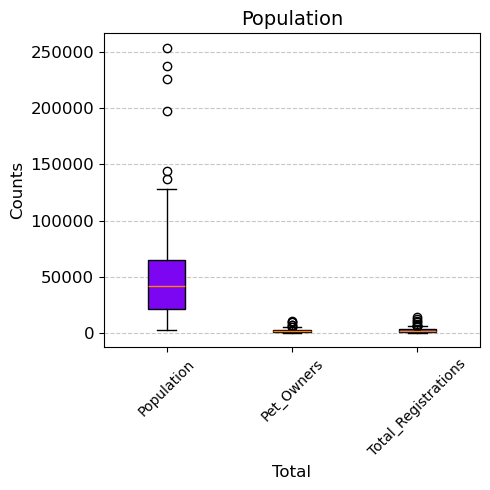

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Seoul_Gu_Dong_Pet_Business_Population = data

# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

# X 축: 구, Y 축: 업종
plt.figure(figsize=(5, 5))
bp = plt.boxplot([Seoul_Gu_Dong_Pet_Business_Population['Population'],
             Seoul_Gu_Dong_Pet_Business_Population['Pet_Owners'],
             Seoul_Gu_Dong_Pet_Business_Population['Total_Registrations']],
             labels=['Population', 'Pet_Owners', 'Total_Registrations'], patch_artist=True)

colors = ['#7C05F2', '#C55CF2', '#323AD9']  # 각 열에 대한 원하는 색상을 리스트로 지정합니다.

for box, color in zip(bp['boxes'], colors):
    # 박스 색상 설정
    box.set(color='black', linewidth=1)  # 테두리 색상과 두께
    box.set(facecolor=color)  # 박스 내부 색상 설정

plt.xlabel('Total', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Population', fontsize=14)
plt.xticks(rotation=45) 
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # 그리드 추가
plt.tight_layout()
plt.savefig('Population_Pet_Owners_Total_Registrations.png', dpi=300, bbox_inches='tight')

# 상관분석

### Pearson 상관계수

In [14]:
df.corr(method='pearson')

,Hospital_Counts,Sales_Counts,Consignment_Counts,Transit_Counts,Production_Counts,Import_Counts,Population,Pet_Owners,Total_Registrations
Hospital_Counts,1.000000,0.581367,0.774490,0.634743,0.123025,0.079955,0.747738,0.808877,0.804647
Sales_Counts,0.581367,1.000000,0.705499,0.465372,0.180450,0.297126,0.446194,0.463478,0.453116
Consignment_Counts,0.774490,0.705499,1.000000,0.642121,0.068255,0.160868,0.655493,0.672881,0.688781
Transit_Counts,0.634743,0.465372,0.642121,1.000000,0.194937,-0.017100,0.803840,0.768660,0.773551
Production_Counts,0.123025,0.180450,0.068255,0.194937,1.000000,0.125925,0.138339,0.147008,0.155359
Import_Counts,0.079955,0.297126,0.160868,-0.017100,0.125925,1.000000,-0.041835,-0.013956,-0.014803
Population,0.747738,0.446194,0.655493,0.803840,0.138339,-0.041835,1.000000,0.907495,0.906300
Pet_Owners,0.808877,0.463478,0.672881,0.768660,0.147008,-0.013956,0.907495,1.000000,0.995426
Total_Registrations,0.804647,0.453116,0.688781,0.773551,0.155359,-0.014803,0.906300,0.995426,1.000000


### Pair Plot

['DejaVu Sans']


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

<Figure size 1000x1000 with 0 Axes>

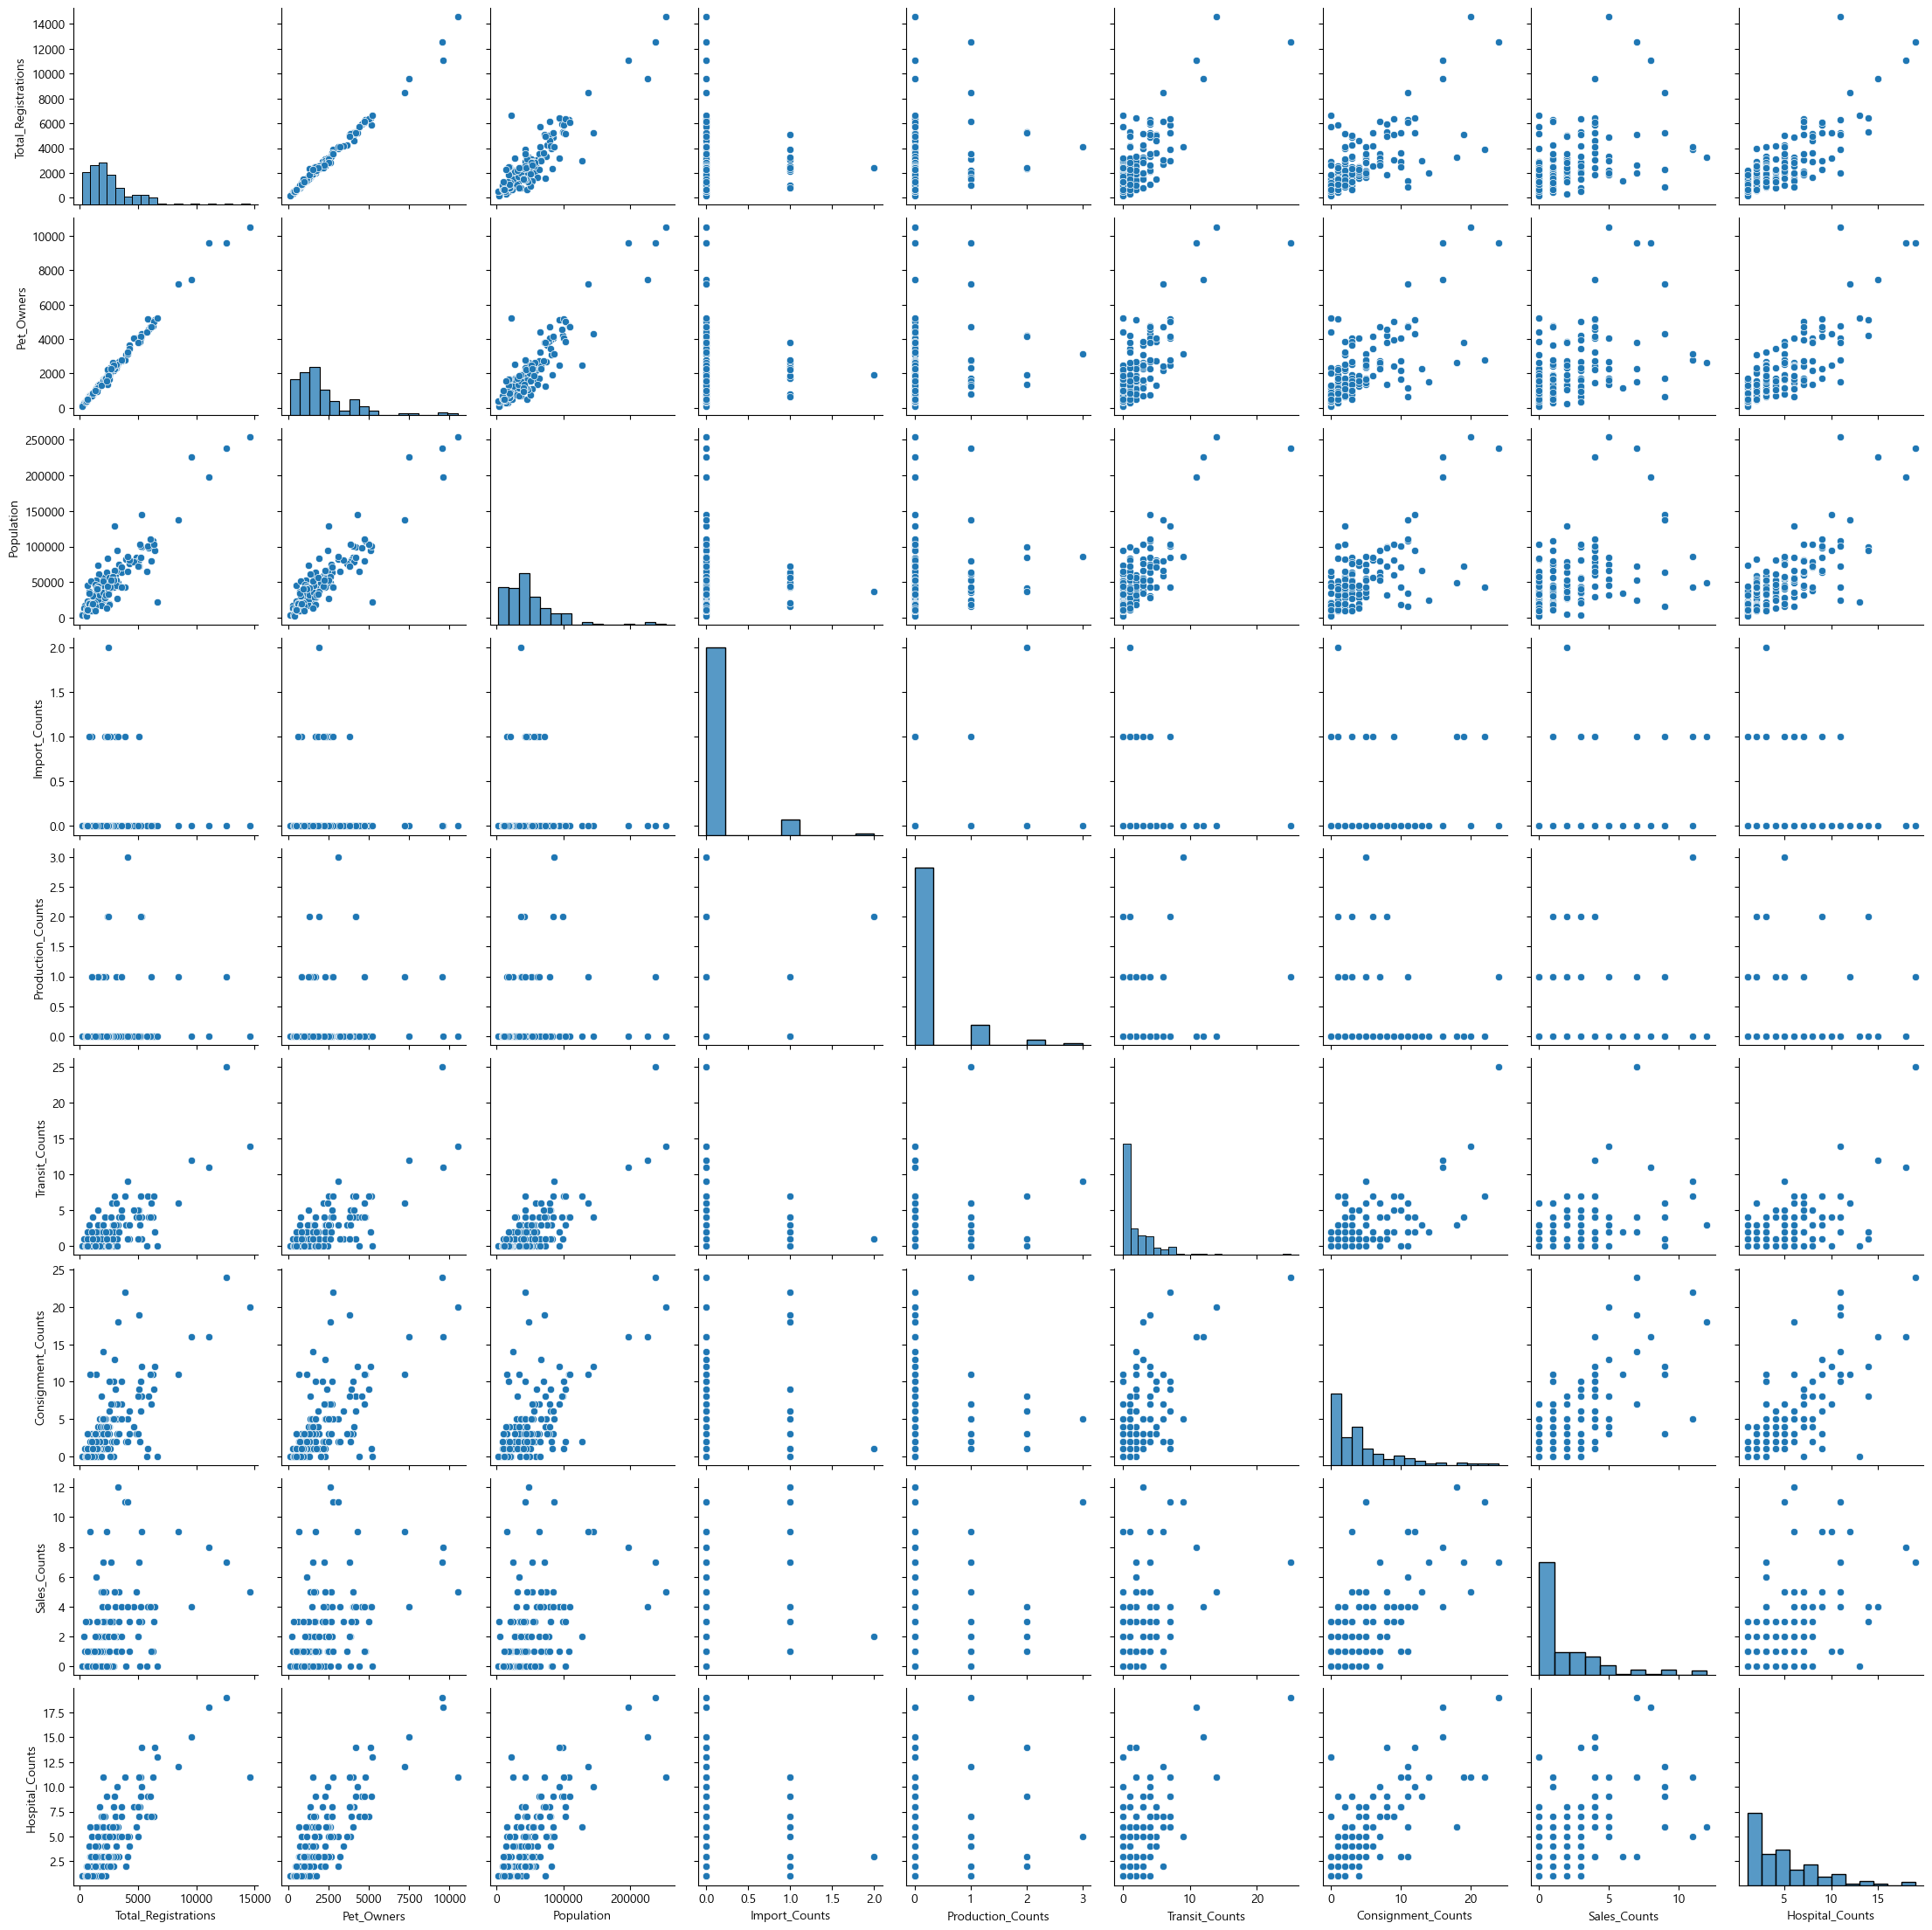

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

print(plt.rcParams['font.family'])
# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

df_pairplot_reversed = Seoul_Gu_Dong_Pet_Business_Population = data
df_pairplot_reversed = Seoul_Gu_Dong_Pet_Business_Population[['Total_Registrations', 'Pet_Owners', 'Population',
                                                              'Import_Counts', 'Production_Counts', 'Transit_Counts',
                                                              'Consignment_Counts', 'Sales_Counts', 'Hospital_Counts']]

plt.figure(figsize=(10,10))
# 사용 가능한 글꼴 중 하나를 선택하여 설정
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['NanumGothic', 'Arial Unicode MS', 'Malgun Gothic']
sns.pairplot(df_pairplot_reversed)
plt.show()

<Figure size 700x500 with 0 Axes>

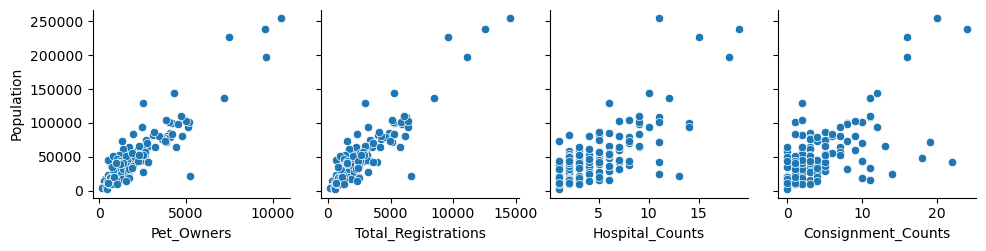

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

df_pairplot = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts', 'Consignment_Counts']]

plt.figure(figsize=(7, 5))
sns.pairplot(df_pairplot, x_vars=['Pet_Owners', 'Total_Registrations', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Population'])
plt.show()

<Figure size 700x500 with 0 Axes>

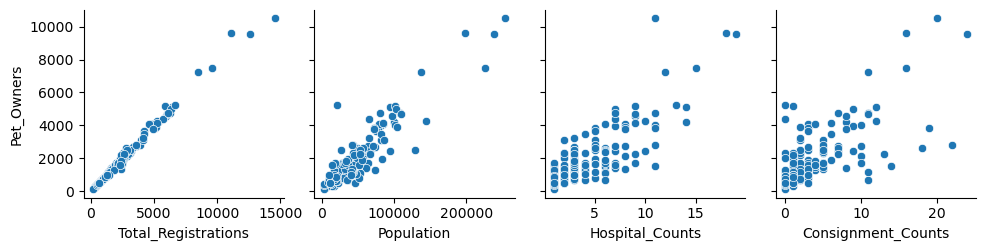

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
df_pairplot_2 = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts','Consignment_Counts']]

# 산점도 그래프 그리기
plt.figure(figsize=(7, 5))
sns.pairplot(df_pairplot_2, x_vars=['Total_Registrations', 'Population', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Pet_Owners'])
plt.show()

['DejaVu Sans']


<Figure size 700x500 with 0 Axes>

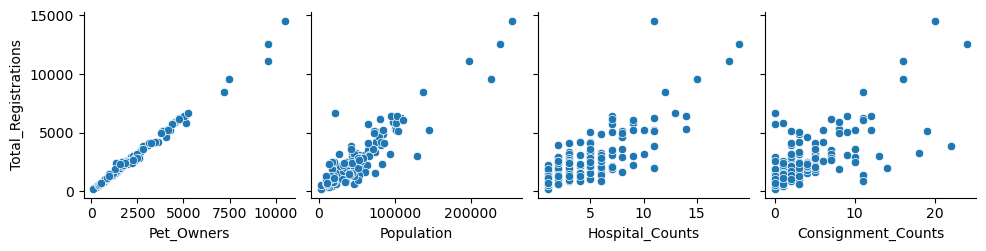

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

print(plt.rcParams['font.family'])
# 사용 가능한 글꼴 중 하나를 선택하여 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

df_pairplot_2 = Seoul_Gu_Dong_Pet_Business_Population[['Pet_Owners', 'Total_Registrations', 'Population', 'Hospital_Counts','Consignment_Counts']]

# 산점도 그래프 그리기
plt.figure(figsize=(7, 5))
sns.pairplot(df_pairplot_2, x_vars=['Pet_Owners', 'Population', 'Hospital_Counts', 'Consignment_Counts'], y_vars=['Total_Registrations'])
plt.show()

### 산점도

상관관계가 0.9 이상인 값
('Population', 'Pet_Owners', 0.9074949974644287)
('Population', 'Total_Registrations', 0.9062996896378848)
('Pet_Owners', 'Total_Registrations', 0.995426420835974)


C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51288\1637116511.py:38: UserWarning:

Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51288\1637116511.py:38: UserWarning:

Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51288\1637116511.py:38: UserWarning:

Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51288\1637116511.py:38: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_51288\1637116511.py:38: UserWarning:

Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.



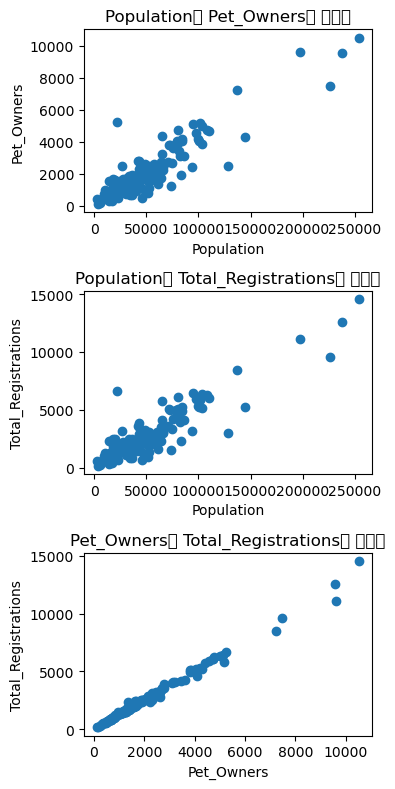

In [29]:

# 산점도 그리기
fig, ax = plt.subplots(nrows=3, figsize=(4, 8))

# 상관관계 행렬에서 0.9 이상인 값의 행과 열 이름 추출
# 0.9 이상일 때, 강한 양적 선형관계를 가짐
correlation_pair = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if correlation.iloc[i, j] >= 0.9:
            pair = (correlation.columns[i], correlation.columns[j], correlation.iloc[i, j])
            correlation_pair.append(pair)

# 중복된 쌍 제거
unique_pair = []
for pair in correlation_pair:
    if (pair[1], pair[0], pair[2]) not in unique_pair:  # 반대 방향의 쌍이 중복되는 경우를 제거
        unique_pair.append(pair)

print("상관관계가 0.9 이상인 값")
for pair in correlation_pair:
    print(pair)
    
# 필요한 행만 추출
correlation_강 = pd.DataFrame(unique_pair)
correlation_강 = correlation_강.iloc[:3]
correlation_강.rename(columns ={0:'변수1', 1:'변수2',2:'상관계수'},inplace=True)
correlation_강

# 각각의 산점도를 서브플롯에 그리기
for i in range(3):
    x_label = correlation_강['변수1'][i]
    y_label = correlation_강['변수2'][i]
    ax[i].scatter(x=data[x_label], y=data[y_label])
    ax[i].set_xlabel(x_label)
    ax[i].set_ylabel(y_label)
    ax[i].set_title(f'{x_label}와 {y_label}의 산점도')

plt.tight_layout()
plt.show()